In [1]:

# For data processing
import numpy as np
import pandas as pd
from datasets import load_dataset

import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
from tqdm import tqdm, tqdm_notebook

import gc

import warnings
warnings.filterwarnings("ignore")

In [2]:

root_dir = "/Users/saranyak/Desktop/GT/Fall2024/NLP/Project/BBC News Summary/News Articles"
#summary_dir = "/Users/saranyak/Desktop/GT/Fall2024/NLP/Project/BBC News Summary/Summaries"
# Show the folders inside the root
print(os.listdir(root_dir))

['entertainment', 'business', 'sport', 'politics', 'tech']


In [3]:
# List which has the unique category names
unique_category = os.listdir(root_dir)

# List to store the category names
news_category_list = []

# List to store the news articles
news_article_list = []

# Iterate through unique category
for category in tqdm(unique_category, colour='yellow'):
    # Get the absolute path of that category directory
    abs_category_path = root_dir + "/" + category
    
    # Create a query to get the absolute path of all the .txt files
    query = abs_category_path + "/*.txt"
    
    # Get the list of absolute path of all the files
    file_paths = glob(query)
    
    # Iterate through all the .txt files path
    for file_path in file_paths:
        try:
            # Open the file
            f = open(file_path, 'r')
            # Read the file contents
            news_article = f.read()
            # Close the file
            f.close()
        except:
            # Open the file
            f = open(file_path, 'rb')
            # Read the file contents
            news_article = f.read()
            # Close the file
            f.close()
            
        # Append new articles and category to respective list
        news_article_list.append(news_article)
        news_category_list.append(category)
        
# Print length of news articles and categories
print("Total Articles: ", len(news_article_list))
print("Total Categories: ", len(news_category_list), end='\n\n')

# Print a sample article
print("Sample Article: ")
print(news_article_list[0])

100%|██████████| 5/5 [00:00<00:00, 10.30it/s]

Total Articles:  2225
Total Categories:  2225

Sample Article: 
Musicians to tackle US red tape

Musicians' groups are to tackle US visa regulations which are blamed for hindering British acts' chances of succeeding across the Atlantic.

A singer hoping to perform in the US can expect to pay $1,300 (£680) simply for obtaining a visa. Groups including the Musicians' Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.

Nigel McCune from the Musicians' Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCune.

"The US is the world's biggest music

In [4]:
# Dictionary to create a dataframe
df_dict = {"news": news_article_list, "labels": news_category_list}

# Convert to dataframe
df = pd.DataFrame(df_dict)

# Show dataframe
df.head()

,news,labels
0,Musicians to tackle US red tape\n\nMusicians' ...,entertainment
1,"U2's desire to be number one\n\nU2, who have w...",entertainment
2,Rocker Doherty in on-stage fight\n\nRock singe...,entertainment
3,Snicket tops US box office chart\n\nThe film a...,entertainment
4,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment


In [6]:
import pandas as pd
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert any non-string to string
    text = str(text)
    
    # Remove newline characters
    text = text.replace('\n', ' ')
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize text and remove stopwords
    tokens = [word.lower() for word in text.split() if word.lower() not in stop_words]
    
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply the preprocessing to 'news' and 'summary' columns
df['news'] = df['news'].apply(preprocess_text)


# Show the cleaned dataframe
print(df.head())



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saranyak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                news         labels
0  musicians tackle us red tape musicians groups ...  entertainment
1  u2s desire number one u2 three prestigious gra...  entertainment
2  rocker doherty onstage fight rock singer pete ...  entertainment
3  snicket tops us box office chart film adaptati...  entertainment
4  oceans twelve raids box office oceans twelve c...  entertainment


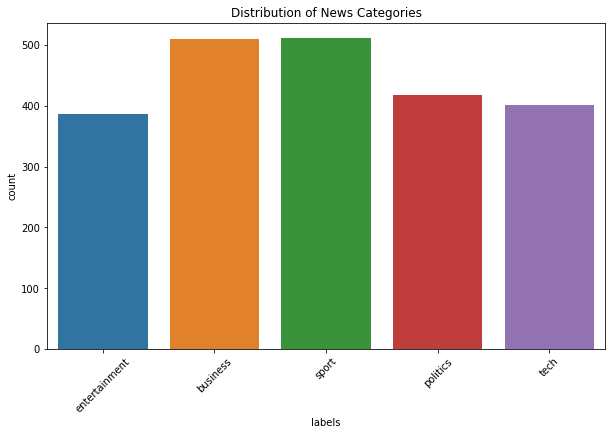

In [7]:
# Count plot of categories
plt.figure(figsize=(10,6))
sns.countplot(x='labels', data=df)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Function to removing the '\n' from the news articles
def remove_ns(text):
    return text.replace("\n", " ")

# To show the progress of apply
tqdm_notebook().pandas()

# Apply this to the data frame
df['news'] = remove_ns(df['news'])

# Show the dataframe
df.head()

0it [00:00, ?it/s]

,news,labels
0,musicians tackle us red tape musicians groups ...,entertainment
1,u2s desire number one u2 three prestigious gra...,entertainment
2,rocker doherty onstage fight rock singer pete ...,entertainment
3,snicket tops us box office chart film adaptati...,entertainment
4,oceans twelve raids box office oceans twelve c...,entertainment


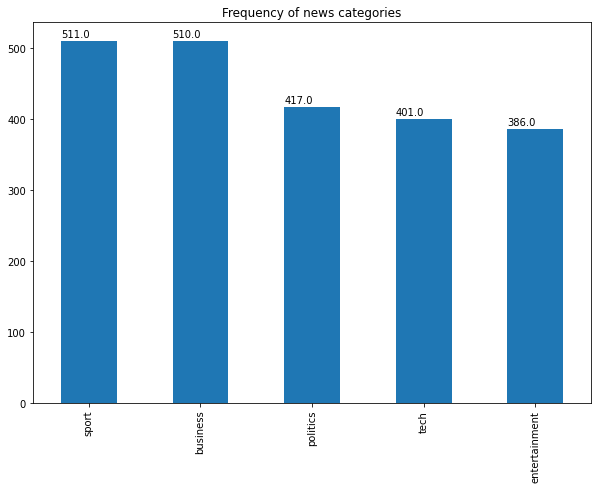

In [9]:
ax = df['labels'].value_counts().plot(kind='bar', figsize=(10,7))

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.title("Frequency of news categories")
plt.show()

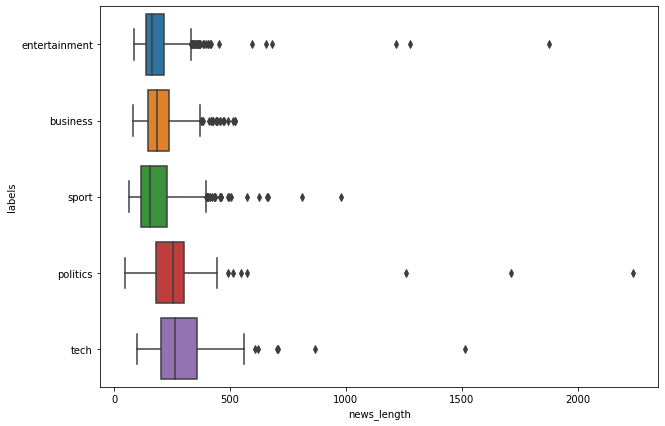

In [10]:
# Create a column which stores the length of the news articles
df['news_length'] = df['news'].str.split().apply(len)

# Create subplot
fig,ax = plt.subplots(figsize=(10,7))

# Plot a boxplot showing the distribution of the length of news articles across categories
sns.boxplot(x='news_length', y='labels', data=df, ax=ax)

# Show the plot
plt.show()

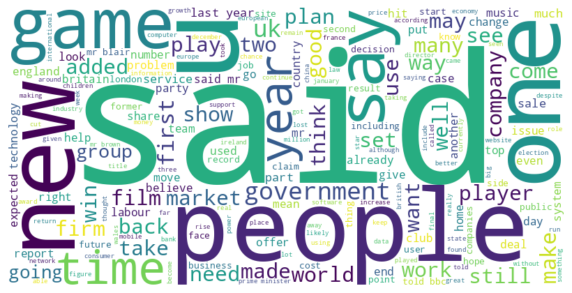

In [12]:
# Combine all news articles into one string for visualization
all_news = ' '.join(df['news'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_news)

# Display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


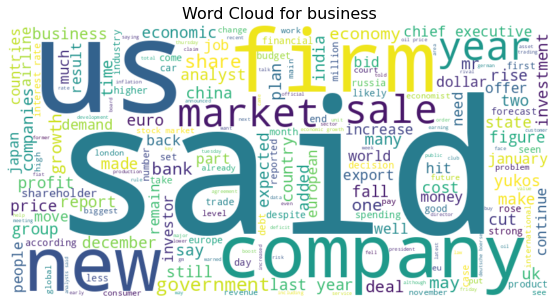

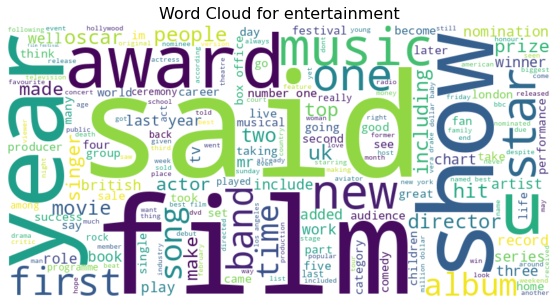

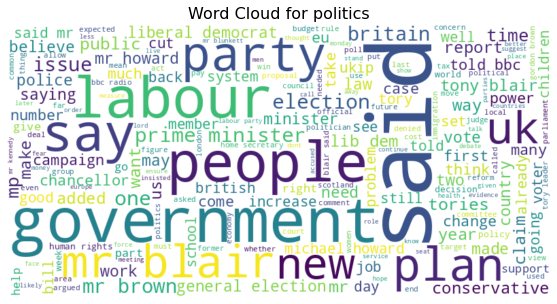

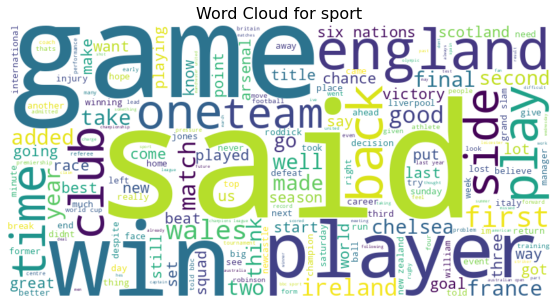

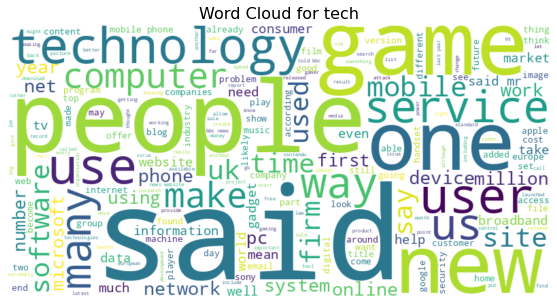

In [13]:
def generate_wordcloud(text, label):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}', fontsize=16)
    plt.show()

# Group data by 'labels' and generate word clouds for each category
label_groups = df.groupby('labels')

for label, group in label_groups:
    all_text = ' '.join(group['news'])
    generate_wordcloud(all_text, label)